# 🧠 Understanding Gradients with the Chain Rule

This notebook explains the concept shown in the image: how to calculate the derivative of a loss function with respect to a model parameter using the **chain rule**. This is the fundamental operation behind how machine learning models, like neural networks, actually learn.

We'll use a very simple linear model to make things clear:
$$ \text{Height} = \text{Intercept} + (1 \times \text{Weight}) $$

---
## 1. The Setup: A Model and a Data Point

First, let's set up the scenario. We have a single observed data point and a simple model. Our goal is to adjust the model's `Intercept` to make the model's prediction as close as possible to the observed data.

- **Observed Data:** Let's say we have observed a person with `Weight = 3` kg and `Height = 7.5` cm. (We're using simple numbers, not realistic ones!)
- **Model:** Our model predicts height based on weight. We'll fix the slope to `1` for simplicity, just like in the image. The only thing we can change is the `Intercept`.
- **Prediction:** `Predicted_Height = (1 * Weight) + Intercept`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Our single, observed data point
observed_weight = 3
observed_height = 7.5

# Let's start with a random guess for the intercept
initial_intercept = 2.0

# The model's prediction function
def predict(weight, intercept):
    # Slope is fixed at 1
    return 1 * weight + intercept

# Get the model's initial prediction
initial_prediction = predict(observed_weight, initial_intercept)

print(f"Observed Data Point: (Weight={observed_weight}, Height={observed_height})")
print(f"Initial Intercept Guess: {initial_intercept}")
print(f"Model's Initial Prediction for Height: {initial_prediction:.2f}")

Observed Data Point: (Weight=3, Height=7.5)
Initial Intercept Guess: 2.0
Model's Initial Prediction for Height: 5.00


---
## 2. The Error: Residual and Loss Function

Our model's prediction (`5.0`) is not equal to the actual observed height (`7.5`). The difference between them is the error, which we call the **residual**.

$$ \text{Residual} = \text{Observed} - \text{Predicted} $$

To get an overall "loss" or "cost", we square the residual. This does two things:
1.  It makes the error positive, regardless of whether the prediction was too high or too low.
2.  It penalizes larger errors more heavily.

$$ \text{Loss} = \text{Residual}^2 = (\text{Observed} - \text{Predicted})^2 $$

Residual (Error): 2.50
Squared Residual (Loss): 6.25


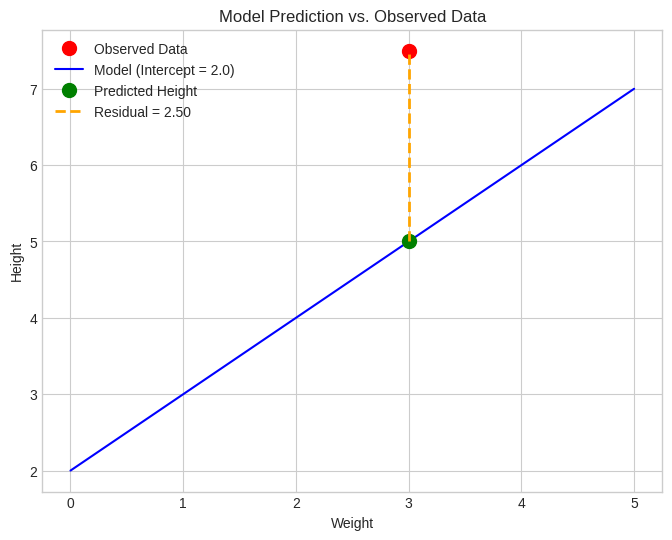

In [2]:
# Calculate the residual and the loss
residual = observed_height - initial_prediction
loss = residual**2

print(f"Residual (Error): {residual:.2f}")
print(f"Squared Residual (Loss): {loss:.2f}")

# Let's visualize the prediction and the residual
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the observed point
ax.plot(observed_weight, observed_height, 'ro', label='Observed Data', markersize=10)

# Plot the model's prediction line
weights = np.linspace(0, 5, 100)
predictions = predict(weights, initial_intercept)
ax.plot(weights, predictions, 'b-', label=f'Model (Intercept = {initial_intercept})')

# Plot the prediction for our specific point
ax.plot(observed_weight, initial_prediction, 'go', markersize=10, label='Predicted Height')

# Draw the residual line
ax.vlines(observed_weight, initial_prediction, observed_height, color='orange', linestyle='--', lw=2, label=f'Residual = {residual:.2f}')

ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Model Prediction vs. Observed Data')
ax.legend()
plt.show()

---
## 3. The Goal: Minimizing Loss with the Chain Rule ⛓️

Our goal is to change the `Intercept` to make the `Loss` as small as possible. Calculus tells us that the minimum of a function occurs where its derivative is zero.

We need to find the derivative of the `Loss` with respect to the `Intercept`. This tells us how a small change in the `Intercept` will affect the `Loss`.

$$ \frac{d(\text{Loss})}{d(\text{Intercept})} = ? $$

This is where the chain rule comes in, just as the image explains. We can't directly calculate this derivative easily, but we can see the *chain of influence*:

1.  The `Intercept` influences the `Predicted` value.
2.  The `Predicted` value influences the `Residual`.
3.  The `Residual` influences the `Loss` (since `Loss = Residual^2`).

The **Chain Rule** lets us break the problem down:

$$ \frac{d(\text{Loss})}{d(\text{Intercept})} = \frac{d(\text{Loss})}{d(\text{Residual})} \times \frac{d(\text{Residual})}{d(\text{Intercept})} $$

#### Part A: Derivative of Loss w.r.t. Residual

This part asks: If the `Residual` changes a little, how much does the `Loss` change?
Since `Loss = Residual^2`:
$$ \frac{d(\text{Loss})}{d(\text{Residual})} = \frac{d(\text{Residual}^2)}{d(\text{Residual})} = 2 \times \text{Residual} $$

#### Part B: Derivative of Residual w.r.t. Intercept
This part asks: If the `Intercept` changes a little, how much does the `Residual` change?

First, let's write `Residual` in terms of the `Intercept`:
$$ \text{Residual} = \text{Observed} - \text{Predicted} $$
$$ \text{Residual} = \text{Observed} - (\text{Weight} + \text{Intercept}) $$
$$ \text{Residual} = \text{Observed} - \text{Weight} - \text{Intercept} $$

Now, let's take the derivative. Remember that `Observed` and `Weight` are just fixed numbers here.
$$ \frac{d(\text{Residual})}{d(\text{Intercept})} = \frac{d(\text{Observed} - \text{Weight} - \text{Intercept})}{d(\text{Intercept})} = -1 $$

#### Final Combination

Now we just multiply the two parts together!

$$ \frac{d(\text{Loss})}{d(\text{Intercept})} = (2 \times \text{Residual}) \times (-1) = -2 \times \text{Residual} $$

This final expression is the **gradient**. It tells us the slope of the loss function with respect to the intercept. We can use it to update our intercept and make our model better!

In [3]:
# Let's calculate the gradient using our numbers

# Part A
dLoss_dResidual = 2 * residual
print(f"d(Loss)/d(Residual) = {dLoss_dResidual:.2f}")

# Part B
dResidual_dIntercept = -1
print(f"d(Residual)/d(Intercept) = {dResidual_dIntercept}")

# Final Gradient
gradient = dLoss_dResidual * dResidual_dIntercept
print(f"\nFINAL GRADIENT: d(Loss)/d(Intercept) = {gradient:.2f}")

d(Loss)/d(Residual) = 5.00
d(Residual)/d(Intercept) = -1

FINAL GRADIENT: d(Loss)/d(Intercept) = -5.00


---
## 4. Using the Gradient to Learn ✅

The gradient we calculated (`-5.0`) is the slope of the loss curve at our current `Intercept` of `2.0`.

- A **negative gradient** means we need to **increase** the `Intercept` to move towards the minimum loss.
- A **positive gradient** means we need to **decrease** the `Intercept`.

This gives us the update rule for **gradient descent**:

$$ \text{new_intercept} = \text{old_intercept} - (\text{learning_rate} \times \text{gradient}) $$

The `learning_rate` is a small number (e.g., 0.1) that controls how big of a step we take.

In [4]:
learning_rate = 0.1

print(f"Old Intercept: {initial_intercept:.2f}")

# Update the intercept using the gradient
new_intercept = initial_intercept - (learning_rate * gradient)

print(f"New Intercept after one step: {new_intercept:.2f}")

# Let's see the new prediction and loss
new_prediction = predict(observed_weight, new_intercept)
new_residual = observed_height - new_prediction
new_loss = new_residual**2

print(f"\nNew Prediction: {new_prediction:.2f}")
print(f"Old Loss: {loss:.2f} -> New Loss: {new_loss:.2f}")

Old Intercept: 2.00
New Intercept after one step: 2.50

New Prediction: 5.50
Old Loss: 6.25 -> New Loss: 4.00


Success! ✨ By taking one small step in the direction opposite to the gradient, we updated our `Intercept` from `2.0` to `2.5` and our `Loss` dropped significantly from `6.25` to `4.00`.

Repeating this process many times is how machine learning models "learn" to find the best parameters that minimize the overall loss across all data points.